In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

In [53]:
%matplotlib inline

In [16]:
maze_values = [[4,5,7,9,10,10,10,11,11,11,14,15],[4,5,6,9,10,10,10,12,13,13,13,16],[3,5,7,9,9,11,11,11,12,14,15,16],
               [3,4,7,8,9,10,10,10,15,14,15,15],[3,4,4,5,8,9,9,16,15,14,15,14],[2,3,3,6,8,17,17,16,14,15,16,13],
               [2,4,4,5,8,18,18,15,14,15,16,13],[2,4,4,6,7,7,7,15,14,15,14,13],[1,4,4,3,8,7,8,8,13,13,13,12],
               [1,2,2,2,5,6,6,9,14,11,11,12],[1,3,4,3,5,7,7,8,11,11,11,12],[0,3,4,4,4,7,7,9,10,10,10,11]]

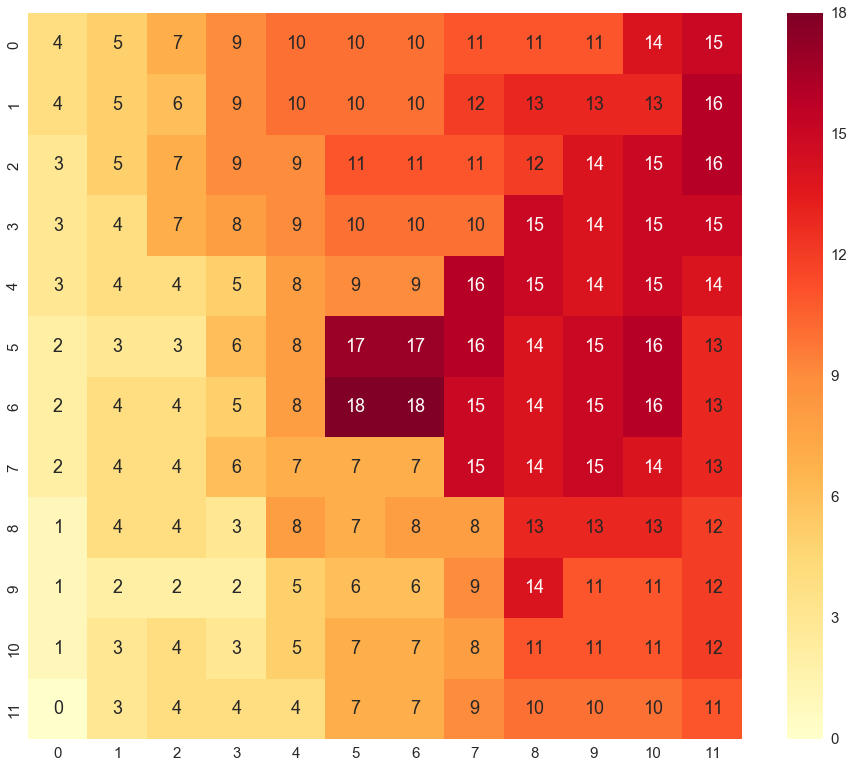

In [24]:
sns.plt.figure(figsize=(16, 13))
sns.set(font_scale=1.5)
sns.heatmap(maze_values, annot=True, cmap='YlOrRd')
plt.show()

In [15]:
maze_values

[[4, 5, 7, 9, 10, 10, 10, 11, 11, 11, 14, 15],
 [4, 5, 6, 9, 10, 10, 12, 13, 13, 13, 16],
 [3, 5, 7, 9, 9, 11, 11, 11, 12, 14, 15, 16],
 [3, 4, 7, 8, 9, 10, 10, 10, 15, 14, 15, 15],
 [3, 4, 4, 5, 8, 9, 9, 16, 15, 14, 15, 14],
 [2, 3, 3, 6, 8, 17, 17, 16, 14, 15, 16, 13],
 [2, 4, 4, 5, 8, 18, 18, 15, 14, 15, 16, 13],
 [2, 4, 4, 6, 7, 7, 7, 15, 14, 15, 14, 13],
 [1, 4, 4, 3, 8, 7, 8, 8, 13, 13, 13, 12],
 [1, 2, 2, 2, 5, 6, 6, 9, 14, 11, 11, 12],
 [1, 3, 4, 3, 5, 7, 7, 8, 11, 11, 11, 12],
 [0, 3, 4, 4, 4, 7, 7, 9, 10, 10, 10, 11]]

In [7]:
twelve_df = pandas.read_csv('./generated_mazes/12x12_batch_maze_runner_results.txt')
fourteen_df = pandas.read_csv('./generated_mazes/14x14_batch_maze_runner_results.txt')
sixteen_df = pandas.read_csv('./generated_mazes/16x16_batch_maze_runner_results.txt')
eighteen_df = pandas.read_csv('./generated_mazes/18x18_batch_maze_runner_results.txt')
twenty_df = pandas.read_csv('./generated_mazes/20x20_batch_maze_runner_results.txt')

In [19]:
frames = [twelve_df, fourteen_df, sixteen_df, eighteen_df, twenty_df]
results_df = pd.concat(frames, ignore_index=True).drop(['file_name'], axis=1)

In [32]:
results_df = results_df.rename(columns=lambda x: x.strip())

In [36]:
results_df[results_df['score'] > 1000].count()

maze_dim           17
upper_benchmark    17
lower_benchmark    17
score              17
dtype: int64

In [37]:
completed_results = results_df[results_df['score'] < 1000]

In [41]:
completed_results.describe()

,maze_dim,upper_benchmark,lower_benchmark,score
count,483.000000,483.000000,483.000000,483.000000
mean,15.958592,28.241408,19.486128,16.713453
std,2.828123,7.931452,5.207377,5.895999
min,12.000000,13.600000,8.800000,4.467000
25%,14.000000,21.066667,15.533333,12.116500
50%,16.000000,28.066667,19.533333,16.200000
75%,18.000000,34.600000,23.666667,20.816500
max,20.000000,46.666667,33.333333,33.867000


In [75]:
completed_results.loc[:,'score_less_lb'] = pd.Series(completed_results['score'] - completed_results['lower_benchmark'])
completed_results.loc[:,'score_less_ub'] = pd.Series(completed_results['score'] - completed_results['upper_benchmark']) 

In [76]:
completed_results.groupby('maze_dim').describe()

lb_less_score  lower_benchmark      score  score_less_lb  \
maze_dim                                                                   
12       count      99.000000        99.000000  99.000000      99.000000   
         mean        1.642081        13.890909  12.248828      -1.642081   
         std         1.498741         2.642243   3.687703       1.498741   
         min        -2.633000         8.800000   4.467000      -4.400000   
         25%         0.533000        11.800000   9.650000      -2.767000   
         50%         1.533000        13.800000  12.333000      -1.533000   
         75%         2.767000        15.800000  14.800000      -0.533000   
         max         4.400000        24.800000  26.033000       2.633000   
14       count      96.000000        96.000000  96.000000      96.000000   
         mean        2.573615        16.043750  13.470135      -2.573615   
         std         2.074468         2.729931   4.057079       2.074468   
         min        -1.833667        10.533333   6.300000      -6.066333   
         25%         1.058083        14.533333  10.299750      -4.075083   
         50%         2.416833        15.533333  13.550000      -2.416833   
         75%         4.075083        17.533333  16.100250      -1.058083   
         max         6.066333        22.533333  23.700000       1.833667   
16       count      98.000000        98.000000  98.000000      98.000000   
         mean        2.894915        19.206803  16.311888      -2.894915   
         std         2.477009         2.753725   4.316824       2.477009   
         min        -2.666667        14.533333   7.567000      -7.666333   
         25%         1.125333        17.533333  12.858000      -4.666833   
         50%         2.466333        19.533333  16.883000      -2.466333   
         75%         4.666833        20.533333  19.458500      -1.125333   
         max         7.666333        26.533333  25.467000       2.666667   
18       count      96.000000        96.000000  96.000000      96.000000   
         mean        3.217740        22.279167  19.061427      -3.217740   
         std         3.258991         2.980566   5.066613       3.258991   
         min        -4.167000        16.800000   6.933000      -9.967000   
         25%         1.042000        19.800000  15.683250      -5.349750   
         50%         3.150000        21.800000  19.517000      -3.150000   
         75%         5.349750        24.050000  22.774750      -1.042000   
         max         9.967000        30.800000  30.067000       4.167000   
20       count      94.000000        94.000000  94.000000      94.000000   
         mean        3.584727        26.333333  22.748606      -3.584727   
         std         3.975069         2.739594   5.349062       3.975069   
         min        -4.033667        19.333333   7.267000     -12.233333   
         25%         1.074833        24.333333  19.733500      -5.808333   
         50%         2.816333        26.333333  23.266500      -2.816333   
         75%         5.808333        28.333333  26.416500      -1.074833   
         max        12.233333        33.333333  33.867000       4.033667   

                score_less_ub  ub_less_score  upper_benchmark  
maze_dim                                                       
12       count      99.000000      99.000000        99.000000  
         mean       -6.442081       6.442081        18.690909  
         std         1.498741       1.498741         2.642243  
         min        -9.200000       2.167000        13.600000  
         25%        -7.567000       5.333000        16.600000  
         50%        -6.333000       6.333000        18.600000  
         75%        -5.333000       7.567000        20.600000  
         max        -2.167000       9.200000        29.600000  
14       count      96.000000      96.000000        96.000000  
         mean       -9.106948       9.106948        22.577083  
         std         2.074468       2.074468         2.

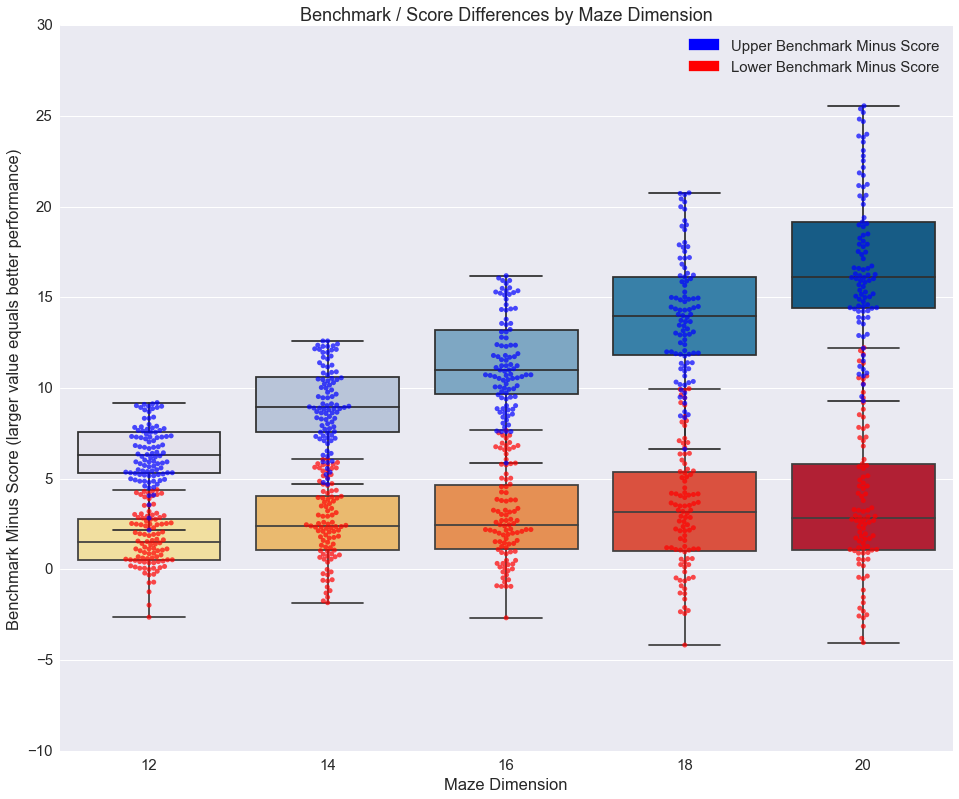

In [84]:
import matplotlib.patches as mpatches

sns.plt.figure(figsize=(16, 13))
sns.set(font_scale=1.5)
red_patch = mpatches.Patch(color='red', label='Lower Benchmark Minus Score')
blue_patch = mpatches.Patch(color='blue', label='Upper Benchmark Minus Score')
ax = sns.boxplot(x="maze_dim", y="lb_less_score", data=completed_results, palette='YlOrRd')
ax = sns.boxplot(x="maze_dim", y="ub_less_score", data=completed_results, palette='PuBu')
ax = sns.swarmplot(x="maze_dim", y="lb_less_score", data=completed_results, color='red', alpha='.7')
ax = sns.swarmplot(x="maze_dim", y="ub_less_score", data=completed_results, color='blue', alpha='.7')
ax.set_title('Benchmark / Score Differences by Maze Dimension')
ax.set_xlabel('Maze Dimension')
ax.set_ylabel('Benchmark Minus Score (larger value equals better performance)')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

In [86]:
completed_results[completed_results['lb_less_score'] > 0].count()

maze_dim           420
upper_benchmark    420
lower_benchmark    420
score              420
lb_less_score      420
ub_less_score      420
score_less_lb      420
score_less_ub      420
dtype: int64

In [87]:
completed_results.describe()

,maze_dim,upper_benchmark,lower_benchmark,score,lb_less_score,ub_less_score,score_less_lb,score_less_ub
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,15.958592,28.241408,19.486128,16.713453,2.772675,11.527954,-2.772675,-11.527954
std,2.828123,7.931452,5.207377,5.895999,2.850139,4.589616,2.850139,4.589616
min,12.000000,13.600000,8.800000,4.467000,-4.167000,2.167000,-12.233333,-25.566667
25%,14.000000,21.066667,15.533333,12.116500,0.900167,7.983333,-4.216667,-14.516833
50%,16.000000,28.066667,19.533333,16.200000,2.433333,10.833667,-2.433333,-10.833667
75%,18.000000,34.600000,23.666667,20.816500,4.216667,14.516833,-0.900167,-7.983333
max,20.000000,46.666667,33.333333,33.867000,12.233333,25.566667,4.167000,-2.167000
